In [1]:
!pip install pycaret

     |████████████████████████████████| 2.1 MB 857 kB/s eta 0:00:01


  Using cached zope.interface-5.1.0-cp37-cp37m-macosx_10_9_x86_64.whl (192 kB)
     |████████████████████████████████| 17.3 MB 911 kB/s eta 0:00:01    |▍                               | 194 kB 868 kB/s eta 0:00:20


  Attempting uninstall: llvmlite
    Found existing installation: llvmlite 0.29.0
ERROR: Cannot uninstall 'llvmlite'. It is a distutils installed project and thus we cannot accurately determine which files belong to it which would lead to only a partial uninstall.
You should consider upgrading via the '/Users/tajahneiwilliams/opt/anaconda3/bin/python -m pip install --upgrade pip' command.


In [2]:
# install flask
!pip install Flask


You should consider upgrading via the '/Users/tajahneiwilliams/opt/anaconda3/bin/python -m pip install --upgrade pip' command.


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing


In [5]:
#Read Csv files using Pandas

data = pd.read_csv('data/germanHeaders.csv', header= None)
data_numeric = pd.read_csv('data/germancredit.csv', header= None)

In [6]:
#Store Column names
columns = data.iloc[0].tolist()
data.columns = columns

In [7]:
# Drop number headers and replace with descriptive headers
data = data.iloc[1:]

In [8]:
data

,NaN,account_status,duration,credit_history,purpose,credit_amount,savings_account,unemployed,installment_rate,personal_status_sex,...,property,age,other_installment_plans,housing,credits,job,liable_for,telephone,foreign_worker,good/bad
1,0.0,A11,6,A34,A43,1169,A65,A75,4,A93,...,A121,67,A143,A152,2,A173,1,A192,A201,1
2,1.0,A12,48,A32,A43,5951,A61,A73,2,A92,...,A121,22,A143,A152,1,A173,1,A191,A201,2
3,2.0,A14,12,A34,A46,2096,A61,A74,2,A93,...,A121,49,A143,A152,1,A172,2,A191,A201,1
4,3.0,A11,42,A32,A42,7882,A61,A74,2,A93,...,A122,45,A143,A153,1,A173,2,A191,A201,1
5,4.0,A11,24,A33,A40,4870,A61,A73,3,A93,...,A124,53,A143,A153,2,A173,2,A191,A201,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
996,995.0,A14,12,A32,A42,1736,A61,A74,3,A92,...,A121,31,A143,A152,1,A172,1,A191,A201,1
997,996.0,A11,30,A32,A41,3857,A61,A73,4,A91,...,A122,40,A143,A152,1,A174,1,A192,A201,1
998,997.0,A14,12,A32,A43,804,A61,A75,4,A93,...,A123,38,A143,A152,1,A173,1,A191,A201,1
999,998.0,A11,45,A32,A43,1845,A61,A73,4,A93,...,A124,23,A143,A153,1,A173,1,A192,A201,2


In [9]:
# Drop NaN column
data = data.iloc[:,1:]

In [10]:
a_columns = ['account_status', 'credit_history', 'purpose', 'savings_account', 'unemployed', 'debtors/guarantors', 'property', 'other_installment_plans', 'housing', 'job', 'foreign_worker', 'telephone', 'personal_status_sex']

a_columns

['account_status',
 'credit_history',
 'purpose',
 'savings_account',
 'unemployed',
 'debtors/guarantors',
 'property',
 'other_installment_plans',
 'housing',
 'job',
 'foreign_worker',
 'telephone',
 'personal_status_sex']

In [11]:
data[a_columns] = data[a_columns].replace({'A':''}, regex=True)
data['good/bad'] = data['good/bad'].replace({'2':'0'}, regex=True)

In [12]:
data = data.apply(pd.to_numeric) 
data

,account_status,duration,credit_history,purpose,credit_amount,savings_account,unemployed,installment_rate,personal_status_sex,debtors/guarantors,...,property,age,other_installment_plans,housing,credits,job,liable_for,telephone,foreign_worker,good/bad
1,11,6,34,43,1169,65,75,4,93,101,...,121,67,143,152,2,173,1,192,201,1
2,12,48,32,43,5951,61,73,2,92,101,...,121,22,143,152,1,173,1,191,201,0
3,14,12,34,46,2096,61,74,2,93,101,...,121,49,143,152,1,172,2,191,201,1
4,11,42,32,42,7882,61,74,2,93,103,...,122,45,143,153,1,173,2,191,201,1
5,11,24,33,40,4870,61,73,3,93,101,...,124,53,143,153,2,173,2,191,201,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
996,14,12,32,42,1736,61,74,3,92,101,...,121,31,143,152,1,172,1,191,201,1
997,11,30,32,41,3857,61,73,4,91,101,...,122,40,143,152,1,174,1,192,201,1
998,14,12,32,43,804,61,75,4,93,101,...,123,38,143,152,1,173,1,191,201,1
999,11,45,32,43,1845,61,73,4,93,101,...,124,23,143,153,1,173,1,192,201,0


In [13]:
#check the shape of data
data.shape

(1000, 21)

In [14]:
data = data.sample(frac=0.95, random_state=786).reset_index(drop=True)
data_unseen = data.drop(data.index).reset_index(drop=True)

print('Data for Modeling: ' + str(data.shape))
print('Unseen Data For Predictions: ' + str(data_unseen.shape))

Data for Modeling: (950, 21)
Unseen Data For Predictions: (0, 21)


In [15]:
from pycaret.classification import *
import lightgbm


In [16]:
exp_clf101 = setup(data = data, target = 'good/bad', session_id=123, numeric_features = ['duration', 'credit_amount', 'present_residence_since', 'installment_rate', 'age', 'credits', 'liable_for']) 

 
Setup Succesfully Completed!


,Description,Value
0,session_id,123
1,Target Type,Binary
2,Label Encoded,None
3,Original Data,"(950, 21)"
4,Missing Values,False
5,Numeric Features,7
6,Categorical Features,13
7,Ordinal Features,False
8,High Cardinality Features,False
9,High Cardinality Method,None


In [17]:
compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,CatBoost Classifier,0.7545,0.7983,0.8774,0.7952,0.8338,0.3676
1,Logistic Regression,0.7516,0.7842,0.8647,0.7994,0.8296,0.3707
2,Linear Discriminant Analysis,0.75,0.7852,0.8624,0.7999,0.8283,0.3658
3,Light Gradient Boosting Machine,0.7485,0.7895,0.858,0.799,0.8272,0.3671
4,Ridge Classifier,0.747,0,0.871,0.7919,0.8282,0.3476
5,Extreme Gradient Boosting,0.747,0.7698,0.8775,0.787,0.8294,0.3449
6,Extra Trees Classifier,0.744,0.7752,0.8796,0.7829,0.8279,0.3327
7,Gradient Boosting Classifier,0.7395,0.778,0.8732,0.7819,0.8243,0.3241
8,Ada Boost Classifier,0.7366,0.7574,0.8452,0.7946,0.8182,0.338
9,Random Forest Classifier,0.7168,0.7397,0.8258,0.7846,0.8036,0.2946


In [18]:
lr = create_model('lr')

,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,0.6866,0.6755,0.8085,0.7600,0.7835,0.2179
1,0.7463,0.8021,0.8085,0.8261,0.8172,0.4027
2,0.7015,0.7223,0.8723,0.7455,0.8039,0.1947
3,0.8060,0.8787,0.9149,0.8269,0.8687,0.5009
4,0.7121,0.7637,0.8298,0.7800,0.8041,0.2632
5,0.8030,0.8707,0.9130,0.8235,0.8660,0.4982
6,0.6970,0.7141,0.7826,0.7826,0.7826,0.2826
7,0.8333,0.8761,0.8696,0.8889,0.8791,0.6109
8,0.7576,0.7717,0.8913,0.7885,0.8367,0.3729
9,0.7727,0.7674,0.9565,0.7719,0.8544,0.3629


In [19]:
rf = create_model('rf')

,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,0.7313,0.6872,0.8298,0.7959,0.8125,0.3395
1,0.7463,0.7878,0.7872,0.8409,0.8132,0.4192
2,0.7015,0.7266,0.8511,0.7547,0.8000,0.2200
3,0.7313,0.7777,0.8723,0.7736,0.8200,0.2980
4,0.6818,0.7251,0.8085,0.7600,0.7835,0.1857
5,0.7576,0.8212,0.7826,0.8571,0.8182,0.4568
6,0.6818,0.6755,0.8261,0.7451,0.7835,0.1895
7,0.7424,0.7832,0.8261,0.8085,0.8172,0.3815
8,0.6970,0.7027,0.8261,0.7600,0.7917,0.2396
9,0.6970,0.7103,0.8478,0.7500,0.7959,0.2162


In [20]:
print(rf)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=123,
                       verbose=0, warm_start=False)


In [21]:
tuned_rf = tune_model('rf')

,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,0.6866,0.7053,0.8298,0.7500,0.7879,0.1937
1,0.7761,0.8426,0.8511,0.8333,0.8421,0.4576
2,0.7015,0.7319,0.8723,0.7455,0.8039,0.1947
3,0.7761,0.8532,0.9787,0.7667,0.8598,0.3427
4,0.7424,0.7391,0.9149,0.7679,0.8350,0.2686
5,0.8182,0.8685,0.9348,0.8269,0.8776,0.5297
6,0.7273,0.7315,0.9348,0.7414,0.8269,0.2225
7,0.8182,0.8717,0.9130,0.8400,0.8750,0.5438
8,0.7424,0.7152,0.9130,0.7636,0.8317,0.3014
9,0.8182,0.7967,0.9565,0.8148,0.8800,0.5147


In [22]:
print(tuned_rf)

RandomForestClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=20, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=2, min_samples_split=7,
                       min_weight_fraction_leaf=0.0, n_estimators=80,
                       n_jobs=None, oob_score=False, random_state=123,
                       verbose=0, warm_start=False)


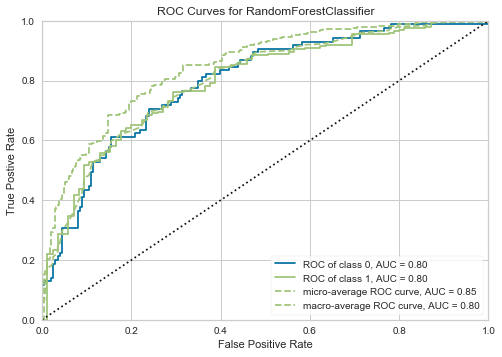

In [23]:
plot_model(tuned_rf, plot = 'auc')

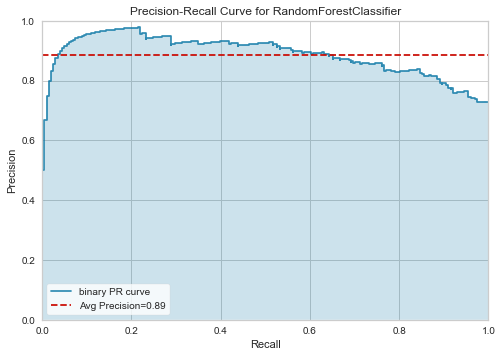

In [24]:
plot_model(tuned_rf, plot = 'pr')

###  Feature Importance Plot

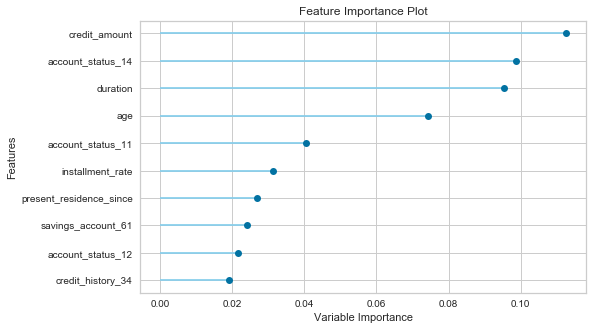

In [25]:
plot_model(tuned_rf, plot='feature')

### Confusion Matrix

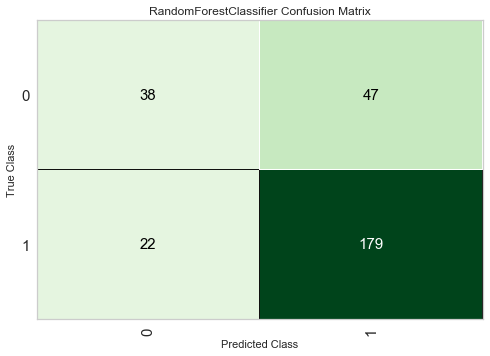

In [26]:
plot_model(tuned_rf, plot = 'confusion_matrix')

#  Predict on test / hold-out Sample

In [27]:
predict_model(tuned_rf);

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,Random Forest Classifier,0.7587,0.7957,0.8905,0.792,0.8384,0.3689


In [28]:
final_rf = finalize_model(tuned_rf)

In [29]:
#Final Random Forest model parameters for deployment
print(final_rf)

RandomForestClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=20, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=2, min_samples_split=7,
                       min_weight_fraction_leaf=0.0, n_estimators=80,
                       n_jobs=None, oob_score=False, random_state=123,
                       verbose=0, warm_start=False)


In [30]:
predict_model(final_rf);

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,Random Forest Classifier,0.9895,1.0,1.0,0.9853,0.9926,0.9746


In [55]:
unseen_predictions = predict_model(final_rf, data=data)
unseen_predictions.head()

,account_status,duration,credit_history,purpose,credit_amount,savings_account,unemployed,installment_rate,personal_status_sex,debtors/guarantors,...,other_installment_plans,housing,credits,job,liable_for,telephone,foreign_worker,good/bad,Label,Score
0,14,12,32,41,2445,65,72,2,94,101,...,143,151,1,173,1,192,201,1,1,0.9690
1,14,24,32,40,1525,64,74,4,92,101,...,143,152,1,173,2,192,201,1,1,0.9794
2,11,30,32,42,2406,61,74,4,92,101,...,143,151,1,173,1,191,201,0,0,0.1724
3,12,18,30,40,2278,62,72,3,92,101,...,143,152,2,173,1,191,201,0,0,0.3162
4,14,18,34,43,2238,61,73,2,92,101,...,143,152,2,173,1,191,201,1,1,0.9742


In [56]:
save_model(final_rf,'Final RF Model 29July2020')

Transformation Pipeline and Model Succesfully Saved
